# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### As you can see the dataset is in the form of an object similar to a `dictionay`. What are the `keys` of the dictionary?

In [6]:
print(list(iris.keys()))


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### To have better understanding of the dataset, let's print it in tabular form.

In [7]:

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Figure below illustrates the features and target labels for iris dataset.

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/iris.png" width="500" hight="300" />

#### What is the value of the key `data`? Assign the value to a variable `X`

In [10]:
X = iris['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### What is the `shape` of `X`?

In [9]:
X.shape

(150, 4)

#### What is the value of the key `target`? Assign the value to a variable `y`

In [11]:
y = iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### What is the `shape` of `y`?

In [12]:
y.shape

(150,)

#### What is the value of the key `target_names`? Assign the value to a variable `target_names`

In [13]:
target_names = iris['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`

In [14]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Exploring and looping through the dataset

#### Print the 5th datapoint in your dataset `X`

In [16]:
print(X[4])

[5.  3.6 1.4 0.2]


#### Print the features and target label of flower 1 to 5.

In [17]:
for i in range(5):
    print(f"Flower {i+1}: Features = {X[i]}, Target = {y[i]}")

Flower 1: Features = [5.1 3.5 1.4 0.2], Target = 0
Flower 2: Features = [4.9 3.  1.4 0.2], Target = 0
Flower 3: Features = [4.7 3.2 1.3 0.2], Target = 0
Flower 4: Features = [4.6 3.1 1.5 0.2], Target = 0
Flower 5: Features = [5.  3.6 1.4 0.2], Target = 0


#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`

In [19]:
sepal_area = X[:, 0] * X[:, 1]
petal_area = X[:, 2] * X[:, 3]

print("sepal areas:", sepal_area[:5])
print("petal areas:", petal_area[:5])

sepal areas: [17.85 14.7  15.04 14.26 18.  ]
petal areas: [0.28 0.28 0.26 0.3  0.28]


#### Find the `max`, `min`, `mean` and `median` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions.

In [20]:
max_values = np.max(X, axis=0)
min_values = np.min(X, axis=0)
mean_values = np.mean(X, axis=0)
median_values = np.median(X, axis=0)

for i, feature in enumerate(feature_names):
    print(f"{feature}:")
    print(f"   min = {min_values[i]:.2f}")
    print(f"   max = {max_values[i]:.2f}")
    print(f"   mean = {mean_values[i]:.2f}")
    print(f"   median = {median_values[i]:.2f}\n")

sepal length (cm):
   min = 4.30
   max = 7.90
   mean = 5.84
   median = 5.80

sepal width (cm):
   min = 2.00
   max = 4.40
   mean = 3.06
   median = 3.00

petal length (cm):
   min = 1.00
   max = 6.90
   mean = 3.76
   median = 4.35

petal width (cm):
   min = 0.10
   max = 2.50
   mean = 1.20
   median = 1.30



# Plotting the data

#### `Box plot` of all features

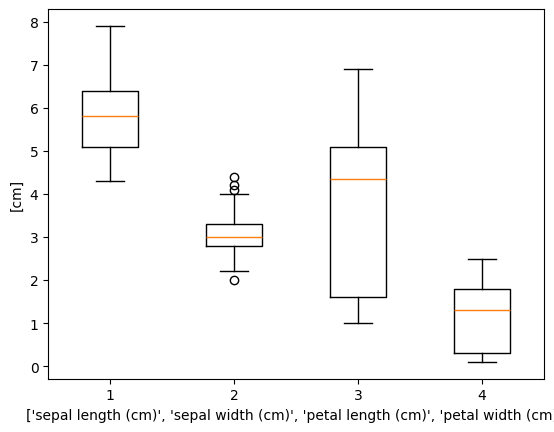

In [22]:
plt.figure()
plt.boxplot(X)
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

#### Histogram of each feature

#### Plot the histogram of each feature.

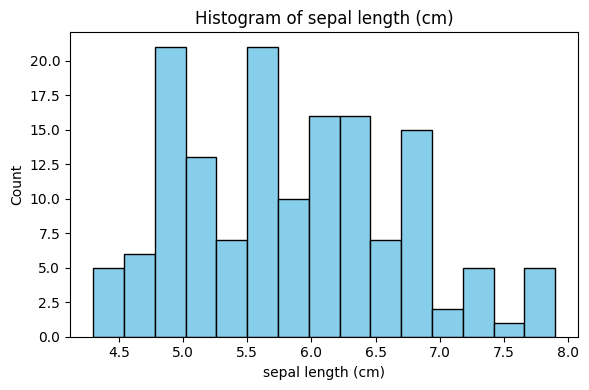

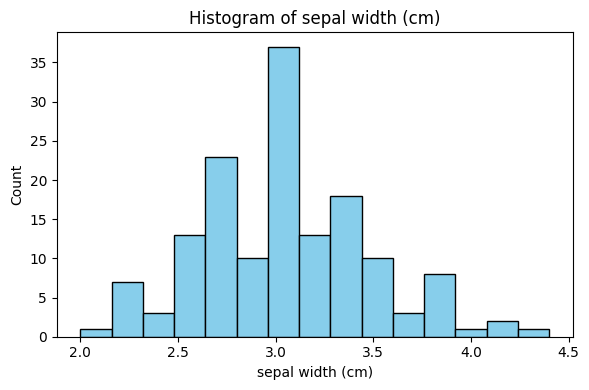

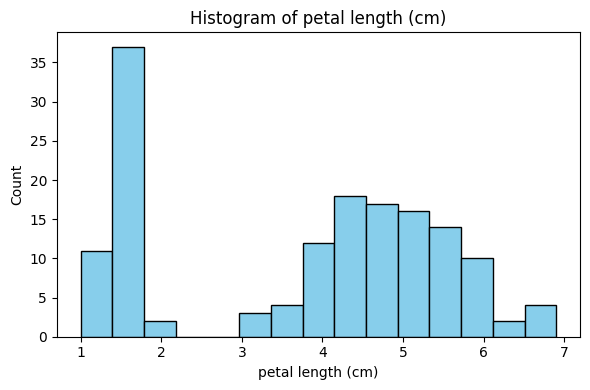

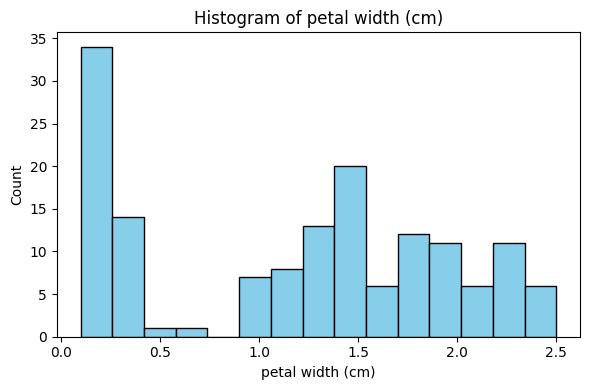

In [29]:
#your code here
import time

for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6,4))
    plt.hist(X[:, i], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    print("\n" * 5)
    time.sleep(0.1)

#### Scatter plot for each pair of features

Plot the scater plot for the pair of first and second features
```python
(X[:,0], X[:,1])
```
Dont't forget to `label` your axes.

hint: use `c=y` inside the scatter plot to color the points based on the target labels.


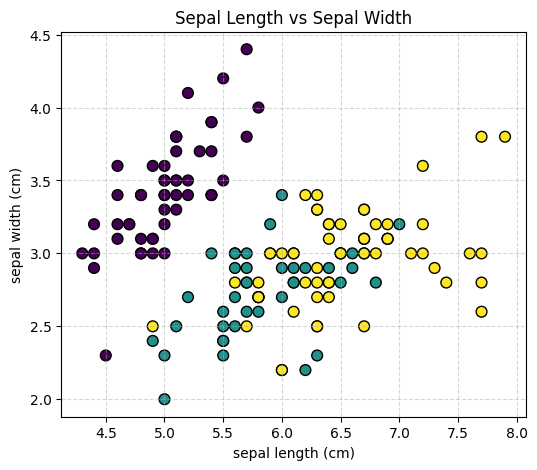

In [31]:
#your code here
plt.figure(figsize=(6, 5))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap='viridis',
    edgecolor='black',
    s=60
)

plt.title("Sepal Length vs Sepal Width")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

(Optional) The plots shown above do not have legend. To add legend to the plot, you can use the following code snippet.

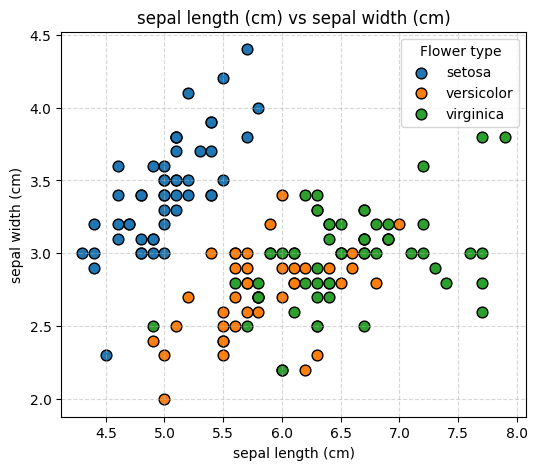

In [33]:
#your code here
def plot_pair_with_legend(x1, x2, x1_label, x2_label, y):
    plt.figure(figsize=(6, 5))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    for i, target_name in enumerate(iris.target_names):
        plt.scatter(
            x1[y == i],
            x2[y == i],
            label=target_name,
            color=colors[i],
            edgecolor='black',
            s=60
        )

    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.title(f"{x1_label} vs {x2_label}")
    plt.legend(title="Flower type")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


plot_pair_with_legend(X[:, 0], X[:, 1], feature_names[0], feature_names[1], y)


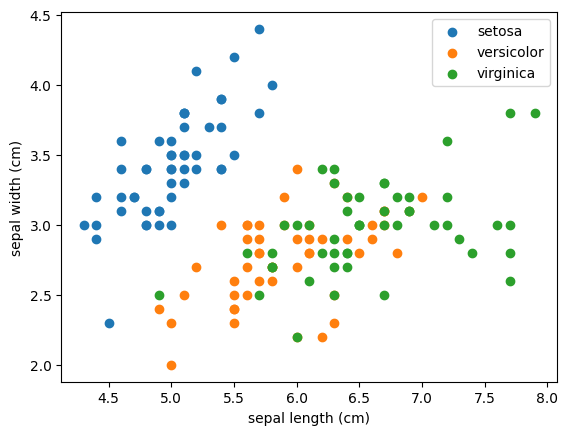

In [34]:
def plot_pair_with_legned(x1, x2, x1_label , x2_label, y):
    plt.figure()
    for i, target_name in enumerate(iris.target_names):
        plt.scatter(x1[y == i], x2[y == i], label=target_name)

    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.legend()
    plt.show()

plot_pair_with_legned(X[:,0], X[:,1], feature_names[0], feature_names[1], y)

#### Write a function called plot_pairwise that takes the pair of feaure and their labels and plot the scatter plot.

In [38]:
def plot_pair(X1, X2, x1_label, x2_label, y):
    plt.figure(figsize=(6, 5))

    plt.scatter(
        X1,
        X2,
        c=y,
        cmap='viridis',
        edgecolor='black',
        s=60
    )

    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.title(f"{x1_label} vs {x2_label}")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

#### Use plot_pari functions and plot the scatter plot for all pairs of features.
```python
X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'
X[:,0], X[:,2], 'Sepal Length', 'Petal Length'
X[:,0], X[:,3], 'Sepal Length', 'Petal Width'
X[:,1], X[:,2], 'Sepal Width', 'Petal Length'
X[:,1], X[:,3], 'Sepal Width', 'Petal Width'
X[:,2], X[:,3], 'Petal Length', 'Petal Width'
```

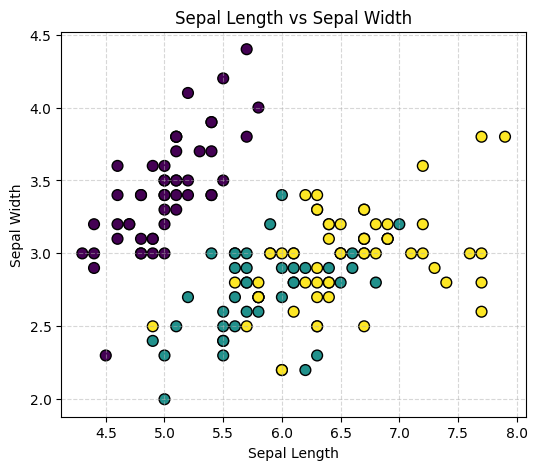

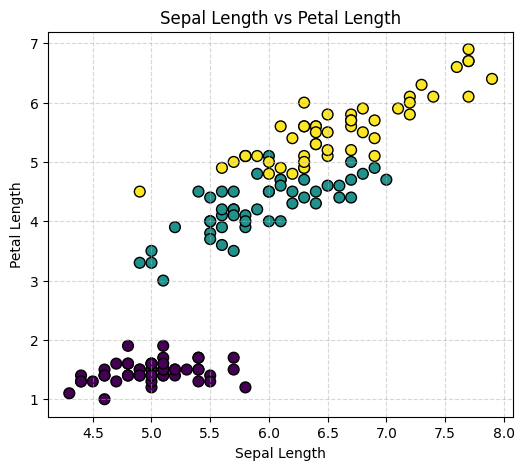

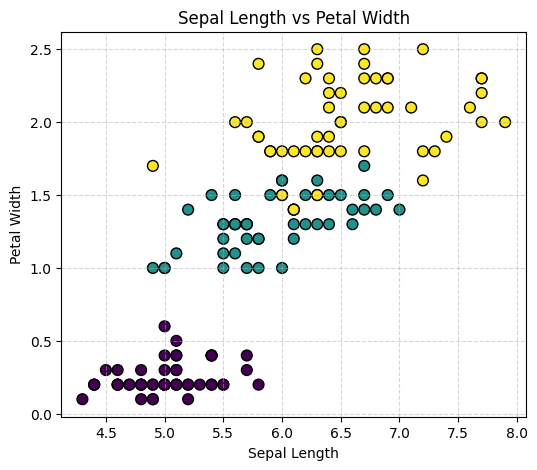

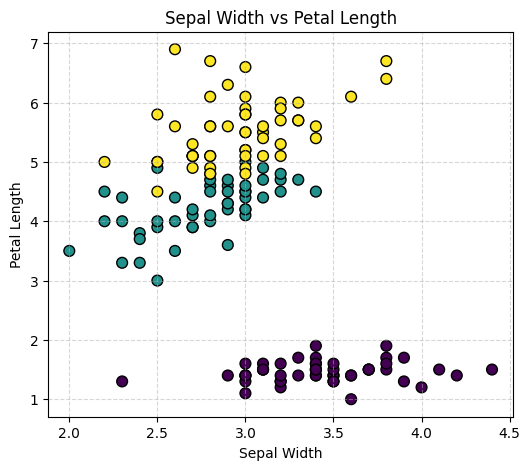

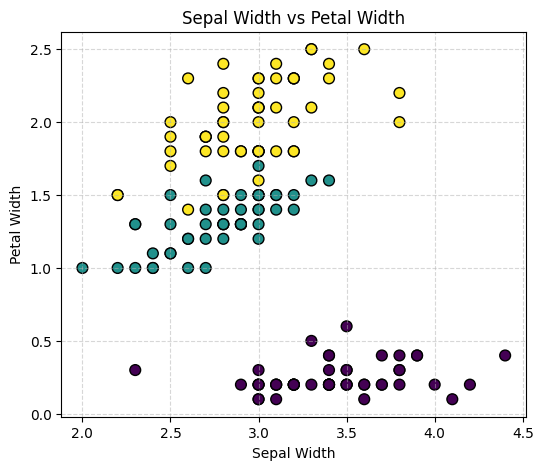

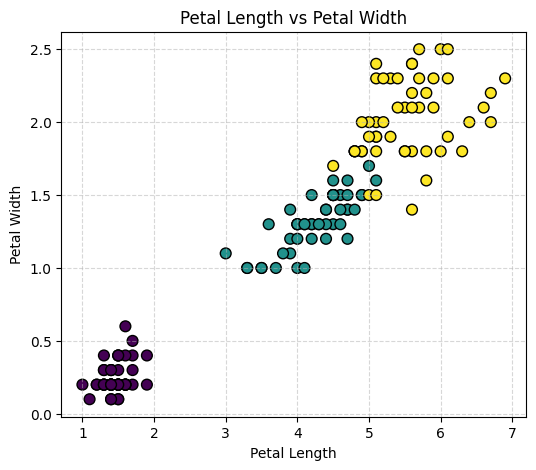

In [42]:
#your code here

plot_pair(X[:, 0], X[:, 1], 'Sepal Length', 'Sepal Width', y)
plot_pair(X[:, 0], X[:, 2], 'Sepal Length', 'Petal Length', y)
plot_pair(X[:, 0], X[:, 3], 'Sepal Length', 'Petal Width', y)
plot_pair(X[:, 1], X[:, 2], 'Sepal Width', 'Petal Length', y)
plot_pair(X[:, 1], X[:, 3], 'Sepal Width', 'Petal Width', y)
plot_pair(X[:, 2], X[:, 3], 'Petal Length', 'Petal Width', y)

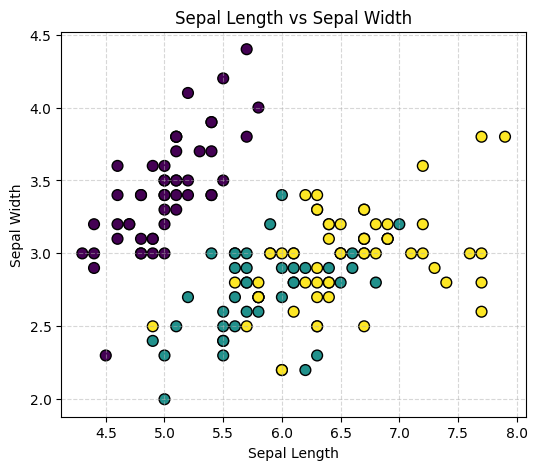

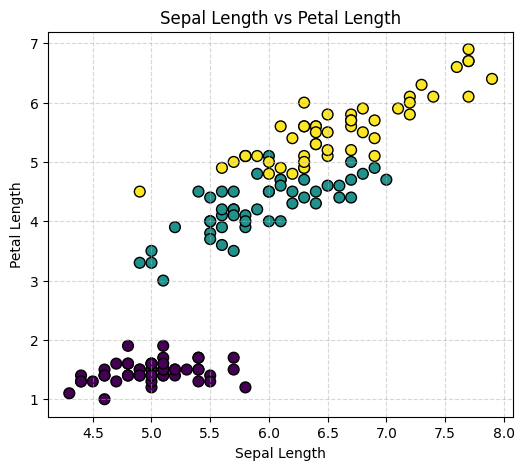

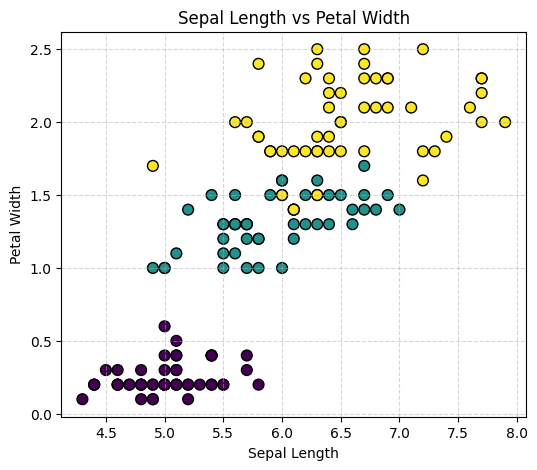

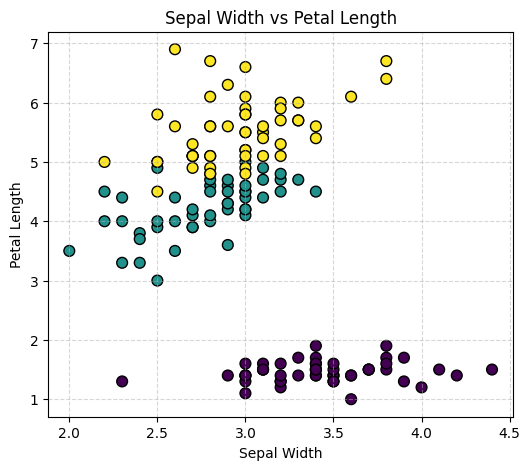

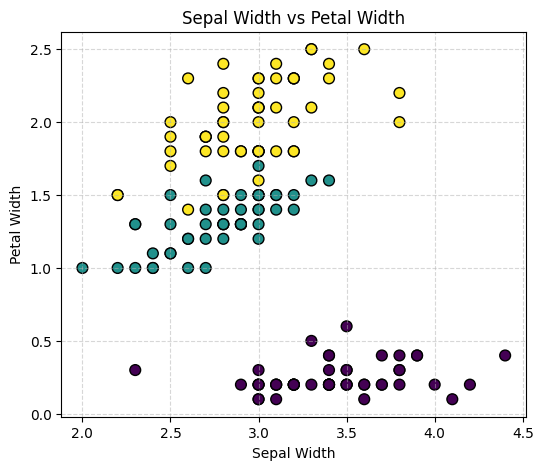

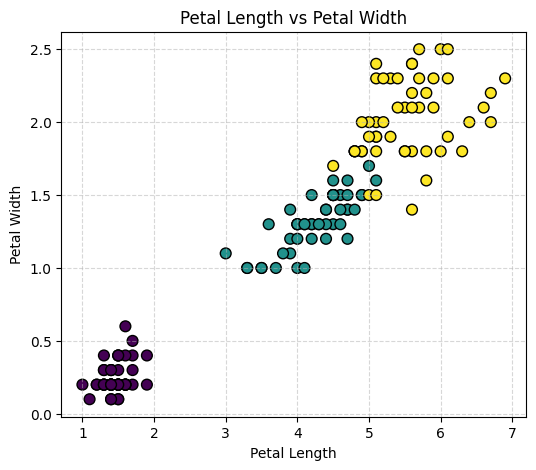

In [41]:
#your code here
import time

pairs = [
    (0, 1, 'Sepal Length', 'Sepal Width'),
    (0, 2, 'Sepal Length', 'Petal Length'),
    (0, 3, 'Sepal Length', 'Petal Width'),
    (1, 2, 'Sepal Width', 'Petal Length'),
    (1, 3, 'Sepal Width', 'Petal Width'),
    (2, 3, 'Petal Length', 'Petal Width')
]

for i, (x1, x2, label1, label2) in enumerate(pairs):
    plot_pair(X[:, x1], X[:, x2], label1, label2, y)

    print("\n" * 5)
    time.sleep(0.2)


# K Nearest Neighbors (KNN)

## Euclidean Distance (2D)

In geometry, the **Euclidean distance** is the straight-line distance between two points.

Given two points $ P(x_1, y_1) $ and $ Q(x_2, y_2)$ in a 2D plane, the Euclidean distance between them is calculated  as follows:

$
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/figure.png" width="400" hight="300" />

#### Example (2D)

Let's say we have two points:
- $ P(2, 2) $
- $ P_2(5, 5) $

$
d(P_1, P_2) = \sqrt{(2 - 5)^2 + (2 - 5)^2}= \sqrt{18} \approx 4.2
$

We can calculate the distance between these two points.

In [ ]:
P = np.array([2, 2])
Q = np.array([5, 5])
distance = np.sqrt(np.sum((P - Q)**2))
distance

np.float64(4.242640687119285)


#### Example (3 Dimensions)

Consider two points in 3D space:
- $ P_1(1, 2, 3) $
- $ P_2(4, 0, 8) $

We can calculate the Euclidean distance as follows:

$
d(P_1, P_2) = \sqrt{(4 - 1)^2 + (0 - 2)^2 + (8 - 3)^2}
$

$
d(P_1, P_2) = \sqrt{3^2 + (-2)^2 + 5^2} = \sqrt{9 + 4 + 25} = \sqrt{38} \approx 6.16
$

In [43]:
# Define two points in 3D space
P1 = np.array([1, 2, 3])
P2 = np.array([4, 0, 8])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P2 - P1)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


#### Write a function that get two np arrays `P` and `Q` and return the Euclidean distance between them.


In [46]:
def straight_line_distance(P, Q):
    return np.sqrt(np.sum((P - Q) ** 2))

In [48]:
#your code here
P = np.array([1, 2, 3])
Q = np.array([4, 0, 8])

distance = straight_line_distance(P, Q)
print(f"The Euclidean distance between P and Q is: {distance:.2f}")

The Euclidean distance between P and Q is: 6.16


## KNN Algorithm Steps

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/knn2.jpg" width="600" hight="100" />

# Implementing KNN

### 0 - Look at the data - Splitting the data into training and testing sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### What is the `shape` of `X_train`, `X_test`, `y_train`, `y_test`?

In [50]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (75, 4)
X_test shape: (75, 4)
y_train shape: (75,)
y_test shape: (75,)


### 1 - Calculate distances

#### Take one sample from test set and find the distance between this sample and all samples in the training set. In addition to the distance, you need to store the index of the sample in the training set.

#### So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).

In [60]:
test_instance = X_test[0]

distances = [] # append the (index, distance) tuples to this list
# your code here

for i, x_train_sample in enumerate(X_train):
    distance = straight_line_distance(test_instance, x_train_sample)
    distances.append((i, float(distance)))  # приведение к обычному float

print("Sample distances (index, distance):")
print([(i, round(d, 6)) for i, d in distances[:5]])

Sample distances (index, distance):
[(0, 0.812404), (1, 1.438749), (2, 1.053565), (3, 3.367492), (4, 1.860108)]


#### Write a function called `calculate_distances` that takes the test sample and the training set and return the distances and the indices of the training samples.

In [61]:
def calculate_distances(test_instance, X_train):
    #return distances
    distances = []
    for i, x_train_sample in enumerate(X_train):
        distance = straight_line_distance(test_instance, x_train_sample)
        distances.append((i, float(distance)))
    return distances

In [65]:
#calculate_distances Test

distances = calculate_distances(X_test[0], X_train)
print("First 5 distances:", [(i, round(d, 6)) for i, d in distances[:5]])

First 5 distances: [(0, 0.812404), (1, 1.438749), (2, 1.053565), (3, 3.367492), (4, 1.860108)]


#### What you pass as `input` to the function `calculate_distances`? What you get as `output` when you call this function?

your answer here

single test sample (test_instance) and the training set (X_train) to the function.

#### What is `shape` of `input` arrays to the function `calculate_distances`? What is the `shape` of `output`?

In [74]:

print("test_instance shape:", test_instance.shape)
print("X_train shape:", X_train.shape)

output = calculate_distances(test_instance, X_train)

print("Output length (number of distance tuples):", len(output))
print("Example of output:", output[:3])

test_instance shape: (4,)
X_train shape: (75, 4)
Output length (number of distance tuples): 75
Example of output: [(0, 0.8124038404635955), (1, 1.438749456993816), (2, 1.0535653752852738)]


### 2 - Find neighbors

**Step 1:** Sort the (index, distance) tuples based on distance value in anascending order.

In [75]:
distances = calculate_distances(test_instance, X_train)
distances.sort(key=lambda x: x[1])
distances

[(34, 0.22360679774997896),
 (45, 0.30000000000000027),
 (28, 0.5099019513592785),
 (35, 0.5099019513592788),
 (66, 0.5196152422706639),
 (47, 0.5291502622129183),
 (17, 0.5830951894845297),
 (36, 0.6164414002968978),
 (65, 0.6244997998398398),
 (41, 0.6480740698407859),
 (48, 0.6999999999999995),
 (70, 0.7071067811865478),
 (63, 0.728010988928052),
 (23, 0.741619848709566),
 (14, 0.754983443527075),
 (68, 0.774596669241483),
 (73, 0.7874007874011811),
 (0, 0.8124038404635955),
 (50, 0.8124038404635965),
 (9, 0.8602325267042631),
 (60, 0.9273618495495711),
 (18, 0.9433981132056598),
 (67, 0.9643650760992956),
 (20, 0.9746794344808962),
 (5, 0.9746794344808963),
 (37, 1.0049875621120894),
 (42, 1.0440306508910553),
 (2, 1.0535653752852738),
 (64, 1.0954451150103324),
 (62, 1.1045361017187258),
 (8, 1.1575836902790226),
 (44, 1.224744871391589),
 (43, 1.296148139681572),
 (11, 1.2999999999999998),
 (71, 1.3490737563232036),
 (38, 1.3490737563232043),
 (31, 1.407124727947029),
 (40, 1.424

**Step 2:** Select the first k elements of the sorted list. And, store the index of these k elements in a list.

In [76]:
k = 3
distances[:k]

[(34, 0.22360679774997896),
 (45, 0.30000000000000027),
 (28, 0.5099019513592785)]

#### Extract the index of the k nearest neighbors from (index, distance) tuples.

In [84]:
# your code here
neighbor_index = [idx for idx, _ in distances[:k]]
print("Indices of k nearest neighbors:", neighbor_index)

Indices of k nearest neighbors: [34, 45, 28]


#### **Step 3:** Find the labels of these top k samples from y_train array.

In [83]:
#your code here
neighbor_label = [y_train[i] for i in neighbor_index]
print("Labels of k nearest neighbors:", neighbor_label)

Labels of k nearest neighbors: [np.int64(1), np.int64(1), np.int64(1)]


#### Now write a function `find_neighbors_label` to do all the steps above from 1 to 3.

In [85]:
def find_neighbors_label(test_instance, X_train, y_train, k):
    """
        Inputs
        test_instance: One data point form test set
        X_train: train dataset
        y_train: train labels
        k: number of neighbours

        Output
        neighbor_label: list of k neighbours labels
    """
    #your code here
    #Calculate distances paird with index (index, distance)
    distances = []
    for i, x_train_sample in enumerate(X_train):
        distance = straight_line_distance(test_instance, x_train_sample)
        distances.append((i, float(distance)))

    #Sort distances
    distances.sort(key=lambda x: x[1])

    #Get the k nearest neighbors index
    neighbor_index = [i for i, _ in distances[:k]]

    #Get the labels of the k nearest neighbors from y_train
    neighbor_label = [y_train[i] for i in neighbor_index]

    return neighbor_label


In [86]:
#find_neighbors_label Test

find_neighbors_label(test_instance, X_train, y_train, 3)

[np.int64(1), np.int64(1), np.int64(1)]

#### What you pass as `input` to the function `find_neighbors`? What you get as `output` when you call this function?

your answer here

Input:
test_instance, X_train, y_train, and k

Output:
A list of labels (neighbor_label) corresponding to the k nearest neighbors of the given test_instance.

#### What is `shape` of `input` arrays to the function `find_neighbors`? What is the `shape` of `output`?

In [87]:
print("test_instance shape:", test_instance.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

output = find_neighbors_label(test_instance, X_train, y_train, 3)
print("Output (neighbor_label) length:", len(output))

test_instance shape: (4,)
X_train shape: (75, 4)
y_train shape: (75,)
Output (neighbor_label) length: 3


#### Explain what operations  are done inside the function `find_neighbors`  to calculate the label of k nearest neighbors?

your answer here

Euclidean distance calculated.

Distances are paired with their corresponding training sample indices.

List of pairs is sorted in ascending order based on distance.

Indices of the k nearest neighbors are extracted.

Labels of these neighbors are retrieved from y_train.

Function returns the list of these k neighbor labels.

### 3 - Vote on labels

You have this function to vote on labels of the k nearest neighbors.

In [88]:
def vote_on_labels(neighbor_label):
    label_to_num_of_occurance = {}
    for label in neighbor_label:
        label_to_num_of_occurance[label] = label_to_num_of_occurance.get(label, 0) + 1

    prediction = max(label_to_num_of_occurance.items(), key=lambda x: x[1]) # find the label with max occurance (label, num_of_occurance)
    return prediction[0] # return the label form the (label, num_of_occurance) tuple

(optional) This is another way to implement the function - Scikit learn uses this method

In [ ]:
# import scipy.stats
# def vote_on_labels(neighbor_label):
#     prediction = scipy.stats.mode(neighbor_label)
#     return prediction[0]

In [89]:
y_pred = vote_on_labels(neighbor_label)
y_pred

np.int64(1)

#### What you pass as `input` to the function `vote_on_label`? What you get as `output` when you call this function?

your answer here

Input:

neighbor_label — a list of labels of the k nearest neighbors.

Output:

A single predicted label (the most frequent label among the k neighbors).

#### What is `shape` of `input` arrays to the function `vote_on_label`? What is the `shape` of `output`?

your answer here

Input shape → (k,)

Output shape → () (a single scalar value)

### 4 - put it all together

#### Now iterate over all datapoints of `X_test` and calculate their label.

In [90]:
#your code here
y_pred = []

for test_instance in X_test:
    neighbor_label = find_neighbors_label(test_instance, X_train, y_train, 3)
    prediction = vote_on_labels(neighbor_label)
    y_pred.append(prediction)

y_pred

[np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.in

#### Turn code into a function `KNN` that takes the `training set`, the `target labels` of the training set, the `test set`, and the value of k and return the predicted labels of the test set.

In [92]:
def KNN(X_train, y_train, X_test, k):
    #output y_pred

    y_pred = []
    for test_instance in X_test:
        neighbor_label = find_neighbors_label(test_instance, X_train, y_train, k)
        prediction = vote_on_labels(neighbor_label)
        y_pred.append(prediction)
    return y_pred

In [93]:
y_pred = KNN(X_train, y_train, X_test, 3)
print(y_pred[:10])

[np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1)]


#### What is the `shape` of the `input` to the function `KNN`? What is the `shape` of the `output`?

In [94]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

y_pred = KNN(X_train, y_train, X_test, 3)
print("y_pred shape:", np.array(y_pred).shape)

X_train shape: (75, 4)
y_train shape: (75,)
X_test shape: (75, 4)
y_pred shape: (75,)


#### Explain which functions you defined from previous steps are used in `KNN` function?

your answer here

KNN function uses two functions defined in the previous steps:

find_neighbors_label() – to find the labels of the k nearest neighbors for each test instance.

vote_on_labels() – to determine the final predicted label by taking the majority vote among those k neighbors.

### 5 - Evaluate the model

Finally, calculate the accuracy of the KNN algorithm.

In [110]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [111]:
accuracy = sum(y_test == y_pred) / len(y_test) #takes True as 1 and False as 0
print(f"accuracy: {accuracy * 100} %")

accuracy: 94.66666666666667 %


#### Turn your code into a function `evaluate` that takes the predicted labels and the true labels and return the accuracy of the model.

In [113]:
def evaluate(y_test, y_pred):
    # your code here
    accuracy = sum(y_test == y_pred) / len(y_test)
    return accuracy * 100

In [114]:
print("Model accuracy:", evaluate(y_test, y_pred), "%")

Model accuracy: 94.66666666666667 %


#### (Optional) 6 - Hyperparameter tuning

### So far we have used k =3 for number of nearest neighbours. Find the best value of `k` for the KNN algorithm on your dataset.

Helper: Find the accuracy of the model for different values of `k` and plot the accuracy vs `k` to find the best value of `k`.

Accuracies for different k: [np.float64(97.33333333333334), np.float64(97.33333333333334), np.float64(97.33333333333334), np.float64(97.33333333333334), np.float64(94.66666666666667), np.float64(96.0), np.float64(94.66666666666667), np.float64(96.0)]


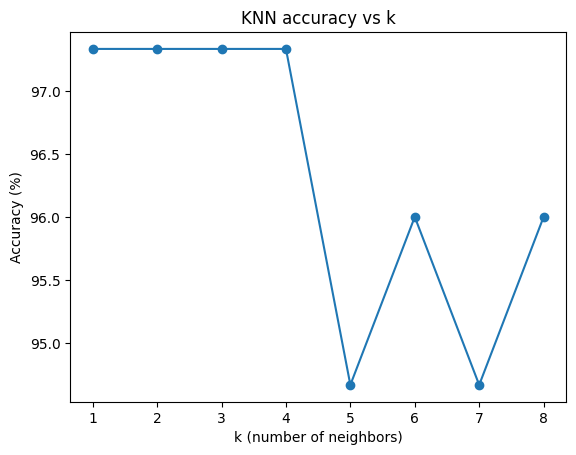

In [117]:
K = [1, 2, 3, 4, 5, 6, 7, 8]
my_accs = []
# your code here

for k in K:
    y_pred = KNN(X_train, y_train, X_test, k)
    acc = evaluate(y_test, y_pred)
    my_accs.append(acc)

print("Accuracies for different k:", my_accs)

plt.plot(K, my_accs, marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("KNN accuracy vs k")
plt.show()

# KNN in Scikit-Learn

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/Scikit-learn-flow.jpeg" width="500" hight="400" />

In [118]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.67%
